In [27]:
answer = set()
for idx in range(1 << 10):
    result = []
    for i in range(10):
        if idx & (1 << i):
            result.append(9 - i) 
    result.sort(reverse=True)
    if not result:
        continue
    answer.add("".join(list(map(str, result))))

ans = sorted(list(map(int, answer)))
n = int(input())
try:
    print(ans[n - 1])
except:
    print(-1)

 19


42


In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import scipy.stats as stats


**결측값에 대한 탐색**

In [6]:
import missingno as msno # 결측값에 대한 시각화

In [12]:
# 포장용기를 판매하는 회사에서 발생한 데이터

df1 = pd.read_csv('data/09_Data.csv', encoding = 'cp949') # unicodedecodeerror: encoding 오류
# encoding: 기호나 특수문자 및 언어를 컴퓨터가 알아들을 수 있는 형태로 변환
# encoder: 문자를 컴퓨터가 이해할 수 있는 형태로 변환 식
# 'cp949': 한국어 관련 변환식
print(df1.shape)
df1.head(2)

(46749, 20)


,Unnamed: 0,결제수단,교환구분,배송번호,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수량,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,품목번호
0,0,무통장입금,교환안함,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,71450,195파이 탕용기 소 300개 1set(2박스),1077.0,13600,1,전화주문 고객,PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,0V00A1,NaN,0,42602
1,1,무통장입금,교환안함,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,141240,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42.0,19800,2,일반,모바일웹,20181229-0000119,2018-12-29 오후 1:22,1V00A1,NaN,0,42930


<Axes: >

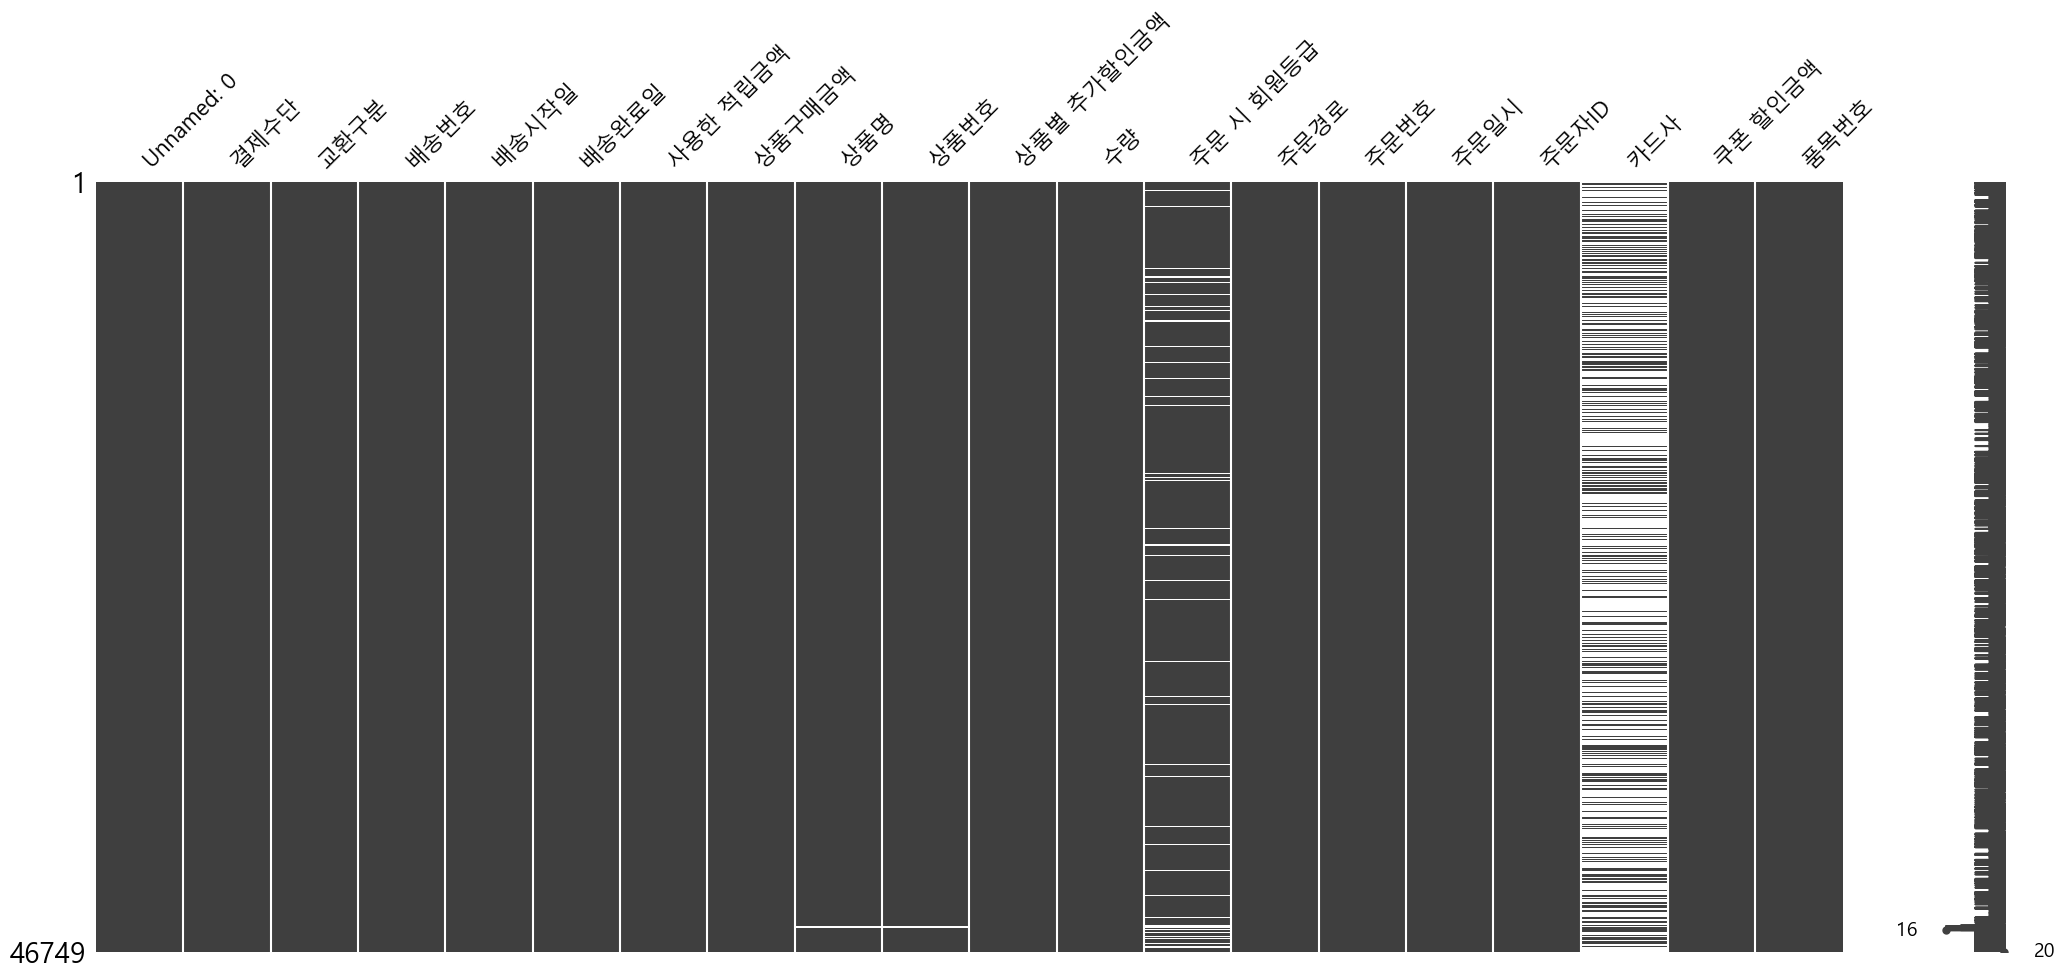

In [18]:
import matplotlib as mpl
mpl.rc('font', family = 'Malgun Gothic')
msno.matrix(df1)

C:\Users\leedo\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.



<Axes: >

C:\Users\leedo\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.

C:\Users\leedo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.



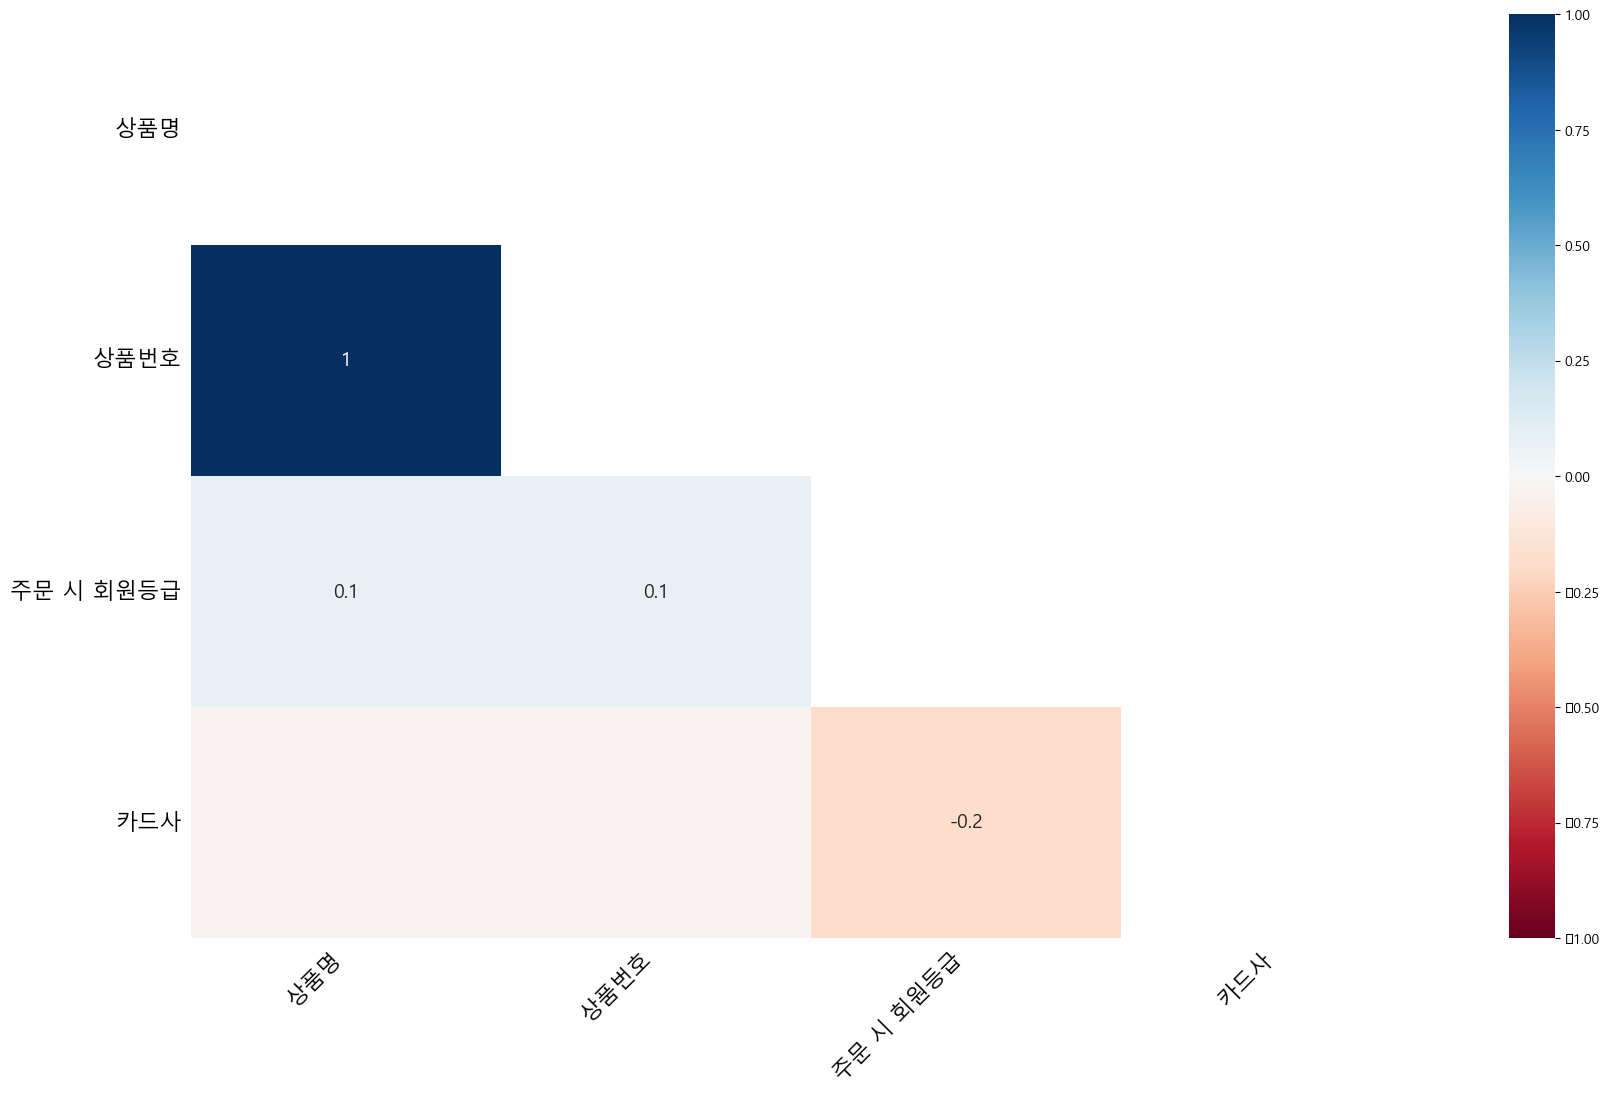

In [20]:
msno.heatmap(df1) # 결측값 간 상관성을 확인
# 1: 한쪽 column에 결측값이 있다면, 다른 column에도 필연적으로 결측값이 존재
# -1: 한쪽 column에 결측값이 있다면, 다른 column에는 필연적으로 데이터가 존재
# 0: 상관없음

**시간 데이터 처리**

In [35]:
def func1(row):
    return row.split()[0]
    
df1['주문일자']= pd.to_datetime(df1['주문일시'].apply(func1))

In [40]:
def func2(row):
    result = row.split()[2].split(":")[0]
    return result

df1['주문일시'].apply(func2).value_counts()

주문일시
11    6204
2     5905
1     5846
10    5146
9     3991
3     3861
4     3409
12    3374
5     3135
8     2073
6     1979
7     1826
Name: count, dtype: int64

In [43]:
def func2(row):
    time_class = row.split()[1]
    time = row.split()[2]
    if time_class == '오전':
        return time
    else:
        hour = int(time.split(':')[0]) + 12 # 시간만 뽑아서 12시간을 더함
        time2 = str(hour) + ":" + time.split(':')[1]
        return time2
        

df1['주문시간'] = df1['주문일시'].apply(func2)
df1['주문시간']

0        14:54
1        13:22
2        15:15
3        10:30
4        10:43
         ...  
46744    13:39
46745    17:16
46746    18:56
46747    10:00
46748    18:15
Name: 주문시간, Length: 46749, dtype: object

<Axes: >

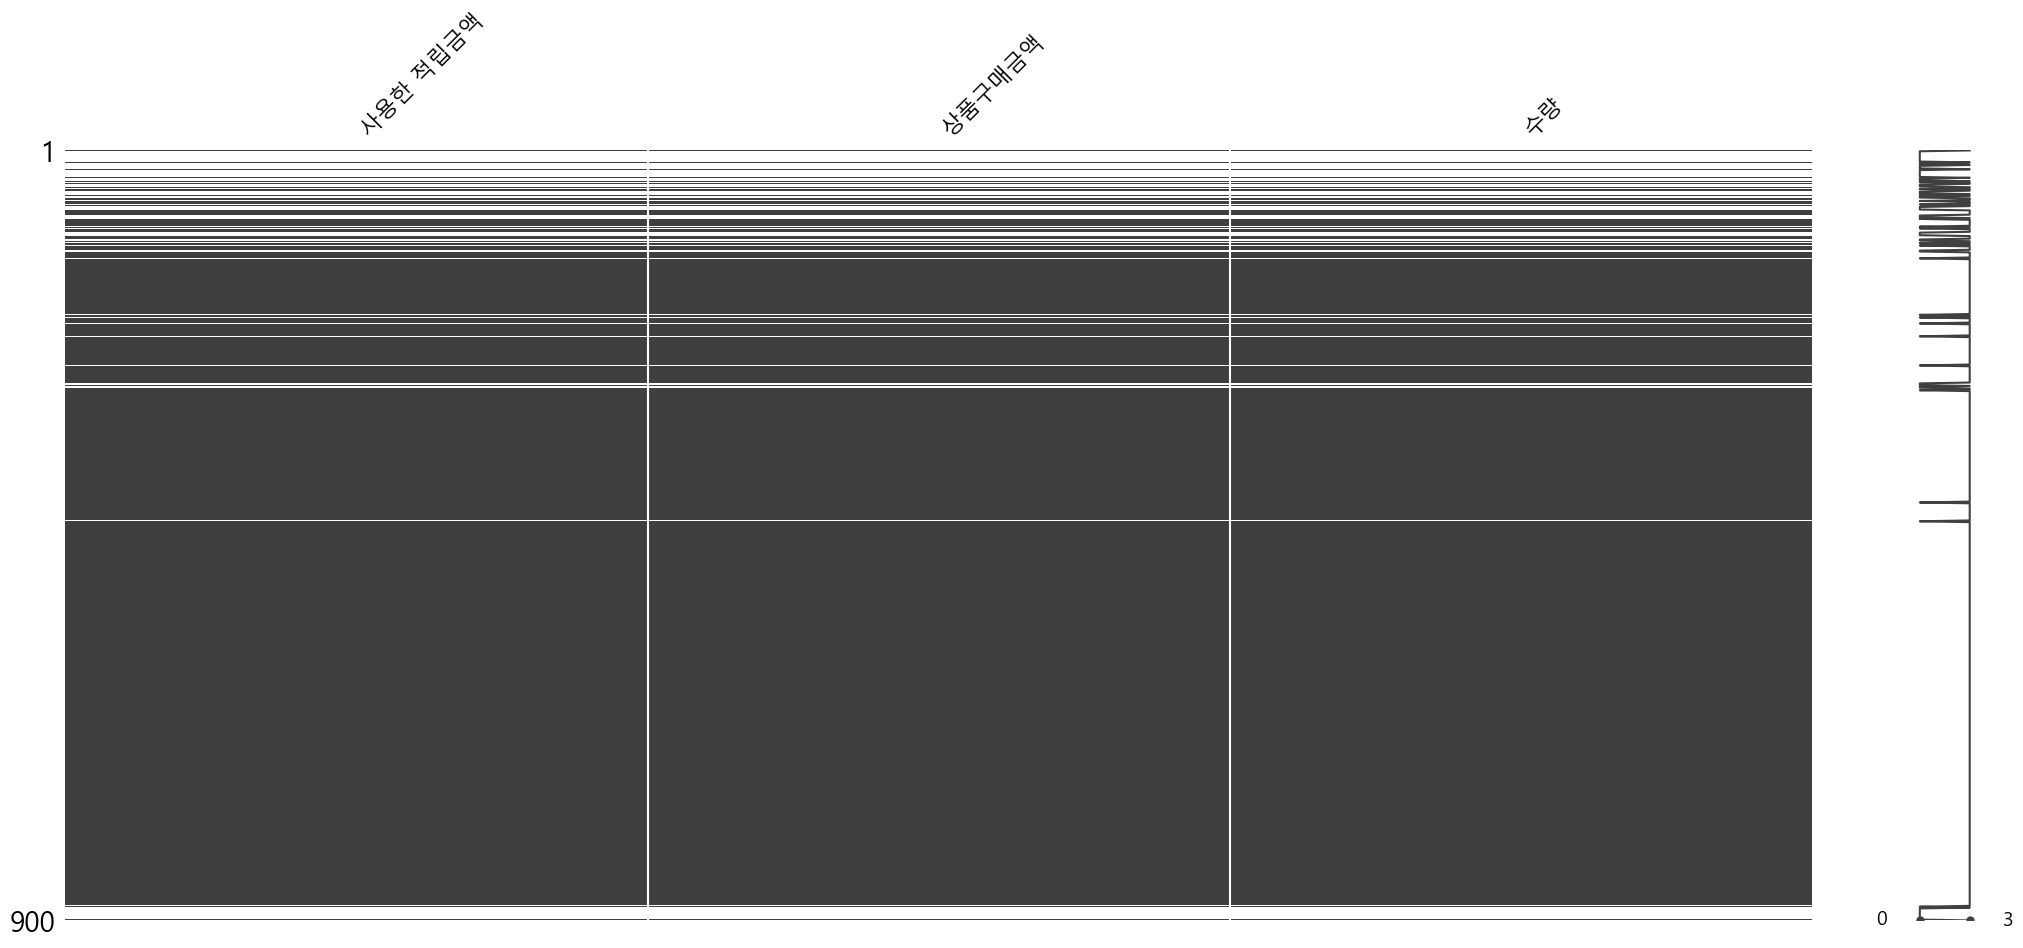

In [48]:
# 일자 별 판매량
p1 = df1.pivot_table(index = '주문일자', values = ['사용한 적립금액', '상품구매금액', '수량'], aggfunc = 'sum')
p2 = p1.resample('1D').mean() # 주문 일자 단위를 일자별로 재 계산
msno.matrix(p2)

In [44]:
df1.columns

Index(['Unnamed: 0', '결제수단', '교환구분', '배송번호', '배송시작일', '배송완료일', '사용한 적립금액',
       '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '주문 시 회원등급', '주문경로',
       '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '품목번호', '주문일자', '주문시간'],
      dtype='object')

# RFM 분석

- RFM 분석은 고객 세분화를 위한 효과적인 도구로 사용되는 마케팅 분석 방법
- RFM은 Rencency(최근성), Frequency(빈도), Monentary(금액)의 약어로, 이 섹지 요소를 기반으로 고객을 분류하고 타겟팅 하는 방법
  - Recency(최근성): 고객이 **얼마나 최근**에 상품을 구매했는지?, 서비스를 이용했는지?
  - Frequenct(빈도): 고객이 **일정 긱간동안 얼마나 자주** 구매를 했는지?
  - Monetary(금액): 고객이 **일정 기간동안 얼마나 많은 금액**을 소비 했는지?
- 각 R,F,M값을 정해진 수식을 이용해 계산하여, 최종 점수를 합산
- 합산된 점수를 이용해 고객을 분할

In [50]:
# 최근성 계산
df1['Recency'] = max(df1['주문일자']) - df1['주문일자']
df1['Recency']

0       174 days
1       172 days
2       171 days
3       170 days
4       170 days
          ...   
46744   537 days
46745   537 days
46746   536 days
46747   535 days
46748   535 days
Name: Recency, Length: 46749, dtype: timedelta64[ns]

In [52]:
p1 = df1.pivot_table(index = '주문자ID', values = 'Recency', aggfunc = 'min').reset_index()
p1.head(2) # 고객 별 최근성을 계산한 Table

,주문자ID,Recency
0,0V00A1,30 days
1,1000V00A1,59 days


In [54]:
p1['Recency']

0       30 days
1       59 days
2       30 days
3      142 days
4      142 days
         ...   
4952   112 days
4953   142 days
4954    22 days
4955    34 days
4956   100 days
Name: Recency, Length: 4957, dtype: timedelta64[ns]

In [60]:
def func3(row): # 앞서 계산한 시간 형식의 Recency 값을 숫자로 변환
    return int(str(row).split()[0])
p1['R'] = p1['Recency'].apply(func3)
p1['R'].describe()

count    4957.000000
mean      186.366149
std       173.458076
min         0.000000
25%        47.000000
50%       121.000000
75%       287.000000
max       899.000000
Name: R, dtype: float64

In [67]:
# 빈도 계싼
df1['F'] = 1
# 몇 일을 주문했는지 계산
p2 = df1.pivot_table(index = ['주문자ID', '주문일자'], values = 'F', aggfunc = 'min').reset_index()
p3 = p2.pivot_table(index = '주문자ID', values = 'F', aggfunc = 'sum').reset_index()
p3

,주문자ID,F
0,0V00A1,6
1,1000V00A1,12
2,1001V00A1,3
3,1002V00A1,1
4,1003V00A1,1
...,...,...
4952,997V00A1,5
4953,998V00A1,1
4954,999V00A1,2
4955,99V00A1,11


In [69]:
p4 = df1.pivot_table(index = '주문자ID', values = '상품구매금액', aggfunc = 'sum').reset_index()
p4

,주문자ID,상품구매금액
0,0V00A1,678340
1,1000V00A1,2864100
2,1001V00A1,468910
3,1002V00A1,260040
4,1003V00A1,96000
...,...,...
4952,997V00A1,772410
4953,998V00A1,281490
4954,999V00A1,203710
4955,99V00A1,880120


In [72]:
# 앞서 계싼한 고객 별 R,F,M 값을 하나의 table로 병합
m1 = pd.merge(p1, p3, on = '주문자ID', how = 'inner')
m2 = pd.merge(m1, p4, on = '주문자ID', how = 'inner')
m2.head(2)

,주문자ID,Recency,R,F,상품구매금액
0,0V00A1,30 days,30,6,678340
1,1000V00A1,59 days,59,12,2864100


In [74]:
df2 = m2.drop(columns = 'Recency').rename(columns = {'상품구매금액':'M'})
df2.describe()

,R,F,M
count,4957.000000,4957.000000,4.957000e+03
mean,186.366149,4.259229,6.542044e+05
std,173.458076,11.820557,3.763728e+06
min,0.000000,1.000000,0.000000e+00
25%,47.000000,1.000000,9.646000e+04
50%,121.000000,2.000000,2.032200e+05
75%,287.000000,4.000000,5.346500e+05
max,899.000000,670.000000,2.475976e+08


In [77]:
# 0.5M + 0.3R + 0.2F = total
df2['Total'] = (df2['M'] / df2['M'].max() * 0.5) + (df2['F'] / df2['F'].max() * 0.2) - (df2['R'] / df2['R'].max() * 0.3)
df2['Total'].describe()

count    4957.000000
mean       -0.059599
std         0.060271
min        -0.299567
25%        -0.094923
50%        -0.039203
75%        -0.013256
max         0.693993
Name: Total, dtype: float64

In [80]:
# 각 고객 별 RFM점수를 등급화 (10%, 30%, 50%)
cond1 = df2['Total'] >= df2['Total'].quantile(0.9)
cond2 = df2['Total'] >= df2['Total'].quantile(0.7)
cond3 = df2['Total'] >= df2['Total'].quantile(0.5)
df2['Rank'] = 'D'
df2.loc[cond3, 'Rank'] = 'C'
df2.loc[cond2, 'Rank'] = 'B'
df2.loc[cond1, 'Rank'] = 'A'
df2['Rank'].value_counts()

Rank
D    2478
C     992
B     991
A     496
Name: count, dtype: int64

In [82]:
# 고객들의 고유 정보를 가져와 병합
df3 = pd.read_csv('data/10_Data.csv')
print(df3.shape)
df3.head(2)

(6575, 10)


,Unnamed: 0,나이,성별,최종접속일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,주문자ID
0,0,45,남자,2016-12-30 오후 5:57,블로그광고,PC,2016-12-30,개인,일반,0V00A1
1,1,53,남자,2017-01-02 오후 12:32,블로그광고,모바일,2017-01-01,개인,일반,1V00A1


In [83]:
df4 = pd.merge(df3, df2, on = '주문자ID', how = 'inner')
df4.shape

(4957, 15)